In [1]:
from viame2coco.viame2coco import viame2coco
import tempfile
import os
import sys
import json
import requests
import pycocotools
import pycocowriter.coco2yolo
import shutil
sys.path.append("..")
from pynoddgcs.publish import NODDCOCODataset

# Publishing Pathway

In [2]:
DATA = '../data'
VIDEO = os.path.join(DATA, 'viame_video_sample_2025_01_13.mp4')
CSV = os.path.join(DATA, 'viame_video_output_2025_01_13.csv')
EXTRACT_PATH = os.path.join(DATA, 'annotations')
COCO_FILE = 'annotations.json' #currently, needs to be in current working directory
os.makedirs(EXTRACT_PATH, exist_ok=True)

## Conversion from VIAME Video to COCO

In [3]:
DESCRIPTION = 'example VIAME annotations'

In [4]:
cocodata = viame2coco(
    CSV,
    DESCRIPTION,
    video_file = VIDEO,
    video_frame_outfile_dir = EXTRACT_PATH
)
cocodata.to_json(COCO_FILE)
print(json.dumps(cocodata.to_dict(), indent=2))

{
  "info": {
    "year": 2025,
    "version": "0.1",
    "description": "example VIAME annotations",
    "date_created": "2025-01-28T17:01:26.333083+00:00"
  },
  "images": [
    {
      "id": 1,
      "file_name": "../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg",
      "width": 1920,
      "height": 1080
    },
    {
      "id": 2,
      "file_name": "../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg",
      "width": 1920,
      "height": 1080
    },
    {
      "id": 3,
      "file_name": "../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg",
      "width": 1920,
      "height": 1080
    },
    {
      "id": 4,
      "file_name": "../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.400000.jpg",
      "width": 1920,
      "height": 1080
    },
    {
      "id": 5,
      "file_name": "../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.600000.jpg",
      "width": 1920,
      "height": 1080
 

## Publish to NODD

In [5]:
coco_nodd_dataset = NODDCOCODataset(COCO_FILE, "nodd_tools/datasets/gfisher/example", "nmfs_odp_pifsc")
coco_nodd_dataset.upload()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
uploading images
../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg


/home/scott/NOAA/research/nodd-tools/pynoddgcs/.venv/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/scott/NOAA/research/nodd-tools/pynoddgcs/.venv/lib/python3.11/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


File ../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg uploaded to nodd_tools/datasets/gfisher/example/data/annotations/viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg.
../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg
File ../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg uploaded to nodd_tools/datasets/gfisher/example/data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg.
../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg
File ../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg uploaded to nodd_tools/datasets/gfisher/example/data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg.
../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.400000.jpg
File ../data/annotations/viame_video_sample_2025_01_13.mp4.00.00.01.400000.jpg uploaded to nodd_tools/datasets/gfisher/example/data/annotations/viame_video_sample_2025_01_13.mp4.00.

In [6]:
# data are published, can remove the local files now
shutil.rmtree(EXTRACT_PATH)
os.remove(COCO_FILE)

# COCO retrieval pathway

In [7]:
UPLOAD_URL = 'https://storage.googleapis.com/nmfs_odp_pifsc/nodd_tools/datasets/gfisher/example/annotations.json'
DOWNLOAD_PATH = os.path.join(DATA, 'download')
COCO_PATH = os.path.join(DOWNLOAD_PATH, 'annotations.json')
IMAGES_PATH = os.path.join(DOWNLOAD_PATH, 'images')
os.makedirs(DOWNLOAD_PATH, exist_ok=True)

In [8]:
uploaded_coco_file = requests.get(UPLOAD_URL)
with open(COCO_PATH, 'wb') as f:
    f.write(uploaded_coco_file.content)
    coco = pycocotools.coco.COCO(COCO_PATH)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [9]:
coco.info()

year: 2025
version: 0.1
description: example VIAME annotations
date_created: 2025-01-28T16:42:04.509043+00:00


In [10]:
coco.download(IMAGES_PATH)

downloaded 0/43 images (t=0.0s)
downloaded 1/43 images (t=0.0s)
downloaded 2/43 images (t=0.0s)
downloaded 3/43 images (t=0.0s)
downloaded 4/43 images (t=0.0s)
downloaded 5/43 images (t=0.0s)
downloaded 6/43 images (t=0.0s)
downloaded 7/43 images (t=0.0s)
downloaded 8/43 images (t=0.0s)
downloaded 9/43 images (t=0.0s)
downloaded 10/43 images (t=0.0s)
downloaded 11/43 images (t=0.0s)
downloaded 12/43 images (t=0.0s)
downloaded 13/43 images (t=0.0s)
downloaded 14/43 images (t=0.0s)
downloaded 15/43 images (t=0.0s)
downloaded 16/43 images (t=0.0s)
downloaded 17/43 images (t=0.0s)
downloaded 18/43 images (t=0.0s)
downloaded 19/43 images (t=0.0s)
downloaded 20/43 images (t=0.0s)
downloaded 21/43 images (t=0.0s)
downloaded 22/43 images (t=0.0s)
downloaded 23/43 images (t=0.0s)
downloaded 24/43 images (t=0.0s)
downloaded 25/43 images (t=0.0s)
downloaded 26/43 images (t=0.0s)
downloaded 27/43 images (t=0.0s)
downloaded 28/43 images (t=0.0s)
downloaded 29/43 images (t=0.0s)
downloaded 30/43 ima

In [11]:
shutil.rmtree(DOWNLOAD_PATH)

# Conversion to YOLO pathway

In [12]:
UPLOAD_URL = 'https://storage.googleapis.com/nmfs_odp_pifsc/nodd_tools/datasets/gfisher/example/annotations.json'
DOWNLOAD_PATH = os.path.join(DATA, 'download')
COCO_PATH = os.path.join(DOWNLOAD_PATH, 'annotations.json')
YOLO_PATH = os.path.join(DOWNLOAD_PATH, 'yolo_training_data')
os.makedirs(YOLO_PATH, exist_ok=True)

In [13]:
uploaded_coco_file = requests.get(UPLOAD_URL)
with open(COCO_PATH, 'wb') as f:
    f.write(uploaded_coco_file.content)

In [14]:
pycocowriter.coco2yolo.coco2yolo(DOWNLOAD_PATH, YOLO_PATH)

Annotations /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/annotations.json: 100%|██████████| 43/43 [00:00

COCO data converted successfully.
Results saved to /home/scott/NOAA/research/nodd-tools/pynoddgcs/notebooks/coco_converted


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
downloaded 0/43 images (t=0.4s)
downloaded 1/43 images (t=0.4s)
downloaded 2/43 images (t=0.8s)
downloaded 3/43 images (t=0.4s)
downloaded 4/43 images (t=0.4s)
downloaded 5/43 images (t=0.4s)
downloaded 6/43 images (t=0.4s)
downloaded 7/43 images (t=0.3s)
downloaded 8/43 images (t=0.5s)
downloaded 9/43 images (t=0.4s)
downloaded 10/43 images (t=0.5s)
downloaded 11/43 images (t=0.4s)
downloaded 12/43 images (t=0.6s)
downloaded 13/43 images (t=0.4s)
downloaded 14/43 images (t=0.4s)
downloaded 15/43 images (t=0.4s)
downloaded 16/43 images (t=0.4s)
downloaded 17/43 images (t=0.4s)
downloaded 18/43 images (t=0.4s)
downloaded 19/43 images (t=0.3s)
downloaded 20/43 images (t=0.4s)
downloaded 21/43 images (t=0.4s)
downloaded 22/43 images (t=0.4s)
downloaded 23/43 images (t=0.4s)
downloaded 24/43 images (t=0.4s)
downloaded 25/43 im

## Train a YOLO model

In [15]:
import mlflow
import torch as pt
import numpy as np
import matplotlib as mpl
from ultralytics import YOLO

In [16]:
# TODO: the yolov8.yaml model file downloaded from Ultralytics needs manual editing for the number of classes
YOLO_YAML = os.path.join(DATA, 'yolov8.yaml')
YOLO_BASE_MODEL = os.path.join(DATA, 'yolov8n.pt')
YOLO_TRAIN_YAML = os.path.join(YOLO_PATH, 'train.yaml')

In [17]:
mlflow.autolog()

In [18]:
model = YOLO(YOLO_YAML).load(YOLO_BASE_MODEL)  # build a new model from scratch

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 319/355 items from pretrained weights


In [19]:
results = model.train(
    data=YOLO_TRAIN_YAML, 
    epochs=5, imgsz=640, device=[0])

New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.66 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX 1000 Ada Generation Laptop GPU, 6141MiB)
engine/trainer: task=detect, mode=train, model=../data/yolov8.yaml, data=../data/download/yolo_training_data/train.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train, exist_ok=False, pretrained=../data/yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fals

100%|██████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 18.8MB/s]


AMP: checks passed ✅


train: Scanning /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/labels... 43

train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.59769]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.56806]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.53981]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.4000


val: Scanning /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/labels.cache..

train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.00.800000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.59769]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.000000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.56806]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.200000.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [1.53981]
train: WARNING ⚠️ /home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.01.4000

Plotting labels to /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


2025/01/28 11:02:19 INFO mlflow.tracking.fluent: Experiment with name '/Shared/Ultralytics' does not exist. Creating a new experiment.


MLflow: logging run_id(27a8e8460d8f463eae87284ee8da9634) to /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      2.03G      4.109      8.868      3.515         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.47i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         27         16    0.00136      0.688    0.00453    0.00112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.11G      4.385      10.51      3.656         11        640: 100%|██████████| 2/2 [00:00<00:00,  3.30i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         27         16    0.00136      0.688      0.004   0.000994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5       2.1G      4.608      9.806      3.876         10        640: 100%|██████████| 2/2 [00:00<00:00,  4.06i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         27         16    0.00136      0.688    0.00472    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.12G      4.406      9.235      3.928         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.65i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00

                   all         27         16   0.000988        0.5    0.00264   0.000619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.04G      4.116      8.163      3.856         10        640: 100%|██████████| 2/2 [00:00<00:00,  3.85i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         27         16    0.00136      0.688    0.00388   0.000691

5 epochs completed in 0.002 hours.
Optimizer stripped from /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train/weights/best.pt, 6.2MB

Validating /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train/weights/best.pt...
Ultralytics 8.3.66 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX 1000 Ada Generation Laptop GPU, 6141MiB)
YOLOv8 summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00


                   all         27         16    0.00136      0.688    0.00423    0.00111
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/detect/train
MLflow: results logged to /home/scott/NOAA/research/nodd-tools/pynoddgcs/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


In [20]:
TEST_IMG = '/home/scott/NOAA/research/nodd-tools/pynoddgcs/data/download/yolo_training_data/annotations/images/data_annotations_viame_video_sample_2025_01_13.mp4.00.00.03.200000.jpg'

In [21]:
trained_model = YOLO(
    YOLO_YAML
).load("../runs/detect/train/weights/best.pt")

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 355/355 items from pretrained weights


In [22]:
predictions = trained_model.predict(TEST_IMG, verbose=False, device=[0], stream=True)

In [23]:
prediction = next(predictions)

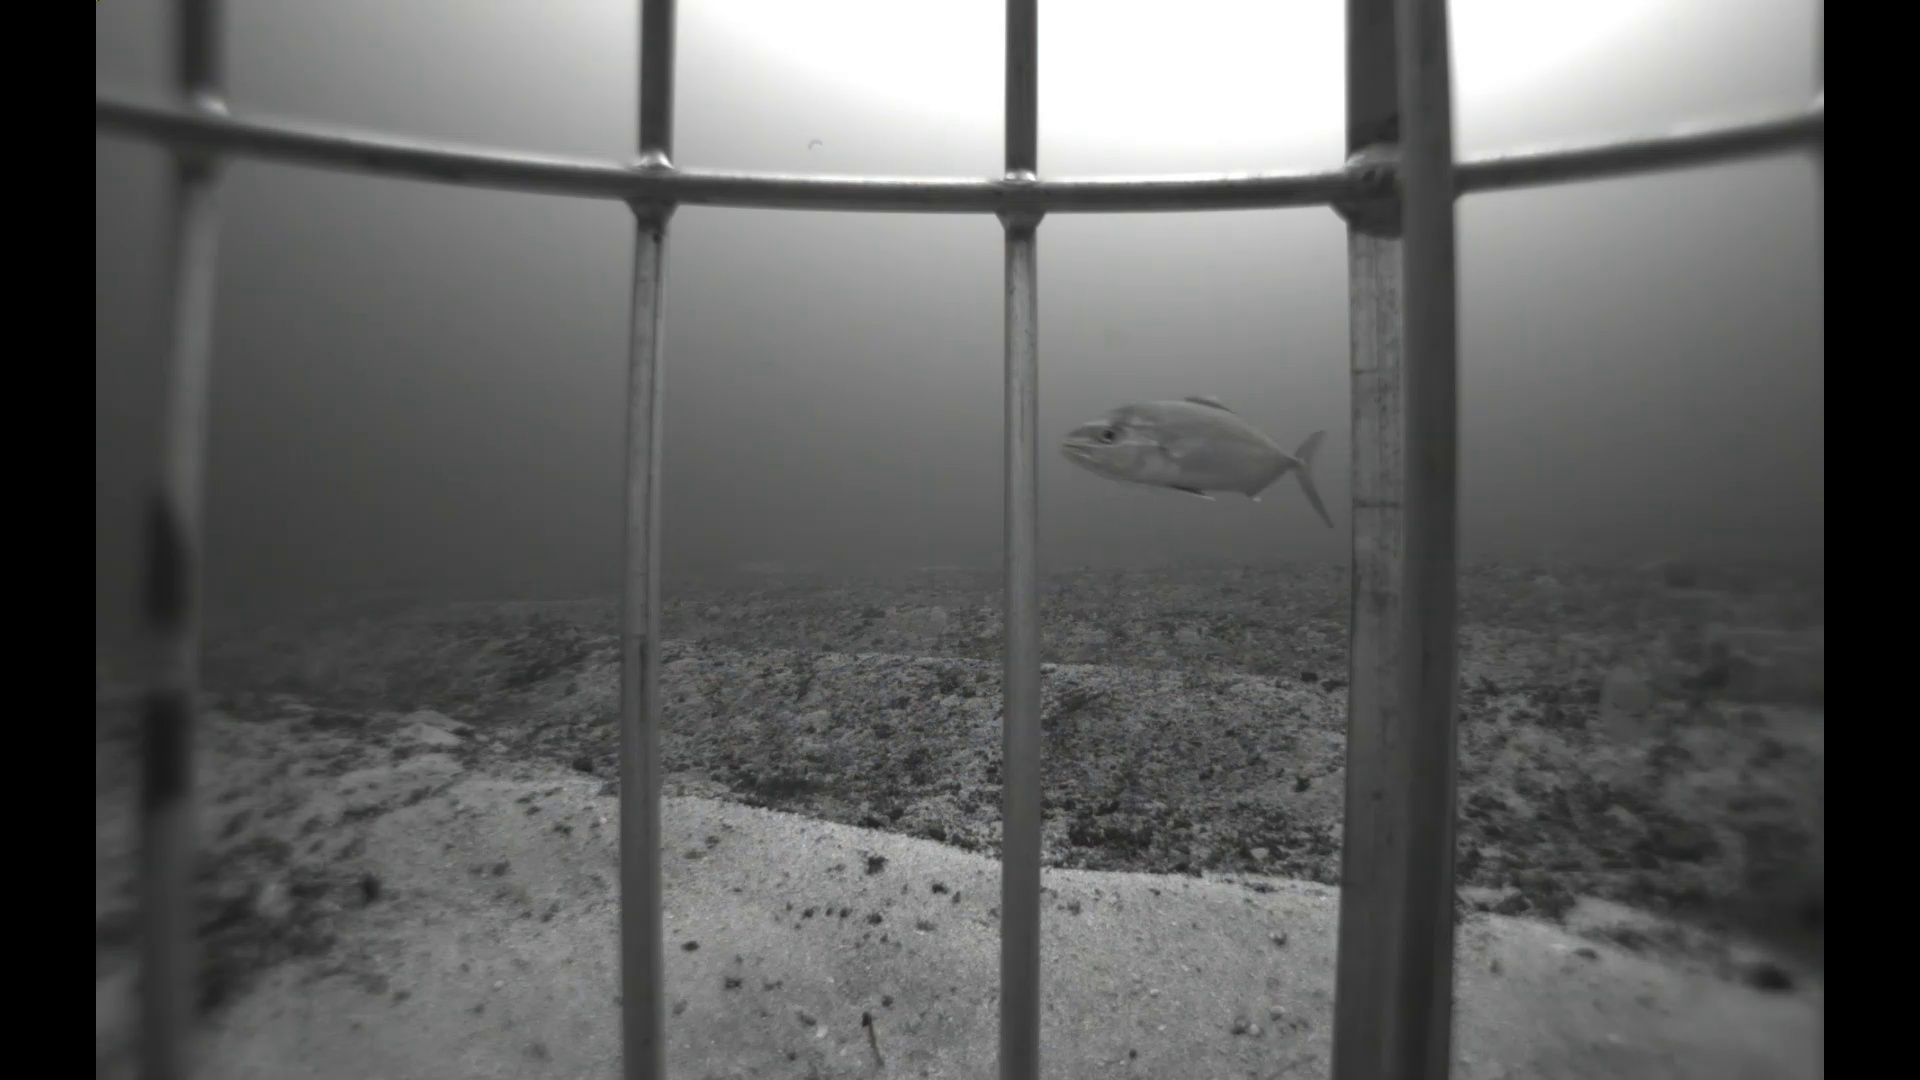

In [24]:
prediction.show()